In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import re

# Metalworking Solutions

Metalworking Solutions is a sheet metal fabricator based in Chattanooga, Tennessee. Established in 2006, the company offers laser cutting, punching, bending, welding, finishing, and delivery services and ships over 2 million parts annually. 

You've been provided a dataset of jobs since the beginning of 2023.

A few tips for navigating the database: Each job can have multiple job operations in the job_operations_2023/job_operations_2024 table. You can connect the jobs to the job_operations. The jmp_job_id references jmo_job_id in the job_operations_2023/job_operations_2024 tables.  Jobs can be connected to sales orders through the sales_order_job_links table.  

1. Do an analysis of customers. The customer can be identified using the jmp_customer_organization_id from the jobs table or the omp_customer_organization_id from the sales_orders table. Here are some example questions to get started:  
    a. Which customers have the highest volume of jobs? Which generate the most revenue (as indicated by the omp_order_subtotal_base in the sales_order table)?  
    b. How has the volume of work changed for each customer over time? Are there any seasonal patterns? How have the number of estimated hours per customer changed over time? Estimated hours are in the jmo_estimated_production_hours columns of the job_operations_2023/job_operations_2024 tables.  
    c. How has the customer base changed over time? What percentage of jobs are for new customers compared to repeat customers?  
    d. Perform a breakdown of customers by operation (as indicated by the jmo_process short_description in the job_operations_2023 or job_operations_2024 table). 

2. Analyze parts. The part can be identified by the jmp_part_id from the jobs table or the jmp_part_id from the job_operations_2023/job_operations_2024 tables. Here are some questions to get started:    
    a. Break down parts by volume of jobs. Which parts are making up the largest volume of jobs? Which ones are taking the largest amount of production hours (based on the jmo_actual_production_hours in the job_operations tables)?  
    b. How have the parts produced changed over time? Are there any trends? Are there parts that were prominent in 2023 but are no longer being produced or are being produced at much lower volumes in 2024? Have any new parts become more commonly produced over time?  
    c. Are there parts that frequently exceed their planned production hours (determined by comparing the jmo_estimated_production_hours to the jmo_actual_production_hours in the job_operations tables)?  
    d. Are the most high-volume parts also ones that are generating the most revenue per production hour?  

3. Inspect the type of operation for each job, as indicated by the jmo_process_short_description in the job_operations_2023 or job_operations_2024 table.  
    a. Are there certain operations, such as welding, which generate more revenue per production hour?  
    b. Are certain operations consistently generating more revenue per production hour than others or has it changed over time?  
    c. Which operations are most frequently associated with the company's top customers? Are they also the ones that are generating the most revenue per production hour?

4. How has the volume of jobs changed over time? Look a the number of booking or number of shipments by week and month. How does on-time delivery vary by week, month, or over time? Does on-time delivery vary by part? To find on-time delivery, you can compare the jmp_completed_date to the jmp_production_due_date column from the jobs table. 

In [43]:
q4_df = pd.read_csv('../data/metal_fab_clean_q4.csv')
q4_df

,jmp_job_id,created_date,created_week_number,production_due_date,completed_date,date_diff,completion_status,jmp_part_id,jmp_order_quantity,jmp_production_quantity
0,31827-0002-001,2023-09-08,36,2023-10-05,2023-09-27,-8.0,On-time,K007-0220,50,50
1,31827-0003-001,2023-09-08,36,2023-10-05,2023-09-20,-15.0,On-time,K007-0820,20,20
2,31831-0001-001,2023-09-08,36,2023-10-31,2023-10-16,-15.0,On-time,M030-0472,160,160
3,31832-0001-001,2023-09-08,36,2023-09-16,2023-09-25,9.0,Late,M030-0008,300,300
4,31833-0001-001,2023-09-08,36,2023-09-20,2023-09-25,5.0,Late,M030-0008,300,300
...,...,...,...,...,...,...,...,...,...,...
14810,35815-0001-001,2024-11-07,45,2024-11-11,2024-11-08,-3.0,On-time,S038-0991,10,10
14811,35819-0001-001,2024-11-08,45,2024-11-26,NaN,NaN,Incomplete,S046-0284,25,25
14812,35819-0002-001,2024-11-08,45,2024-11-26,NaN,NaN,Incomplete,S046-0402,25,25
14813,35820-0001-001,2024-11-08,45,2025-01-28,NaN,NaN,Incomplete,Y002-0455,20,20


In [7]:
q4_df['created_date'] = pd.to_datetime(q4_df['created_date'], format = '%Y-%m-%d')

In [8]:
q4_df['year_month'] = q4_df['created_date'].dt.strftime('%Y-%m')

In [9]:
q4_df['year_week'] = q4_df['created_date'].dt.strftime('%Y-%W')

In [10]:
q4aym_df = q4_df[['year_month', 'jmp_job_id']]

In [11]:
q4aym_grouped_df = q4aym_df.groupby(q4aym_df.year_month).count()
q4aym_grouped_df

,jmp_job_id
year_month,
2023-01,920
2023-02,766
2023-03,1023
2023-04,750
2023-05,739
2023-06,779
2023-07,582
2023-08,756
2023-09,862


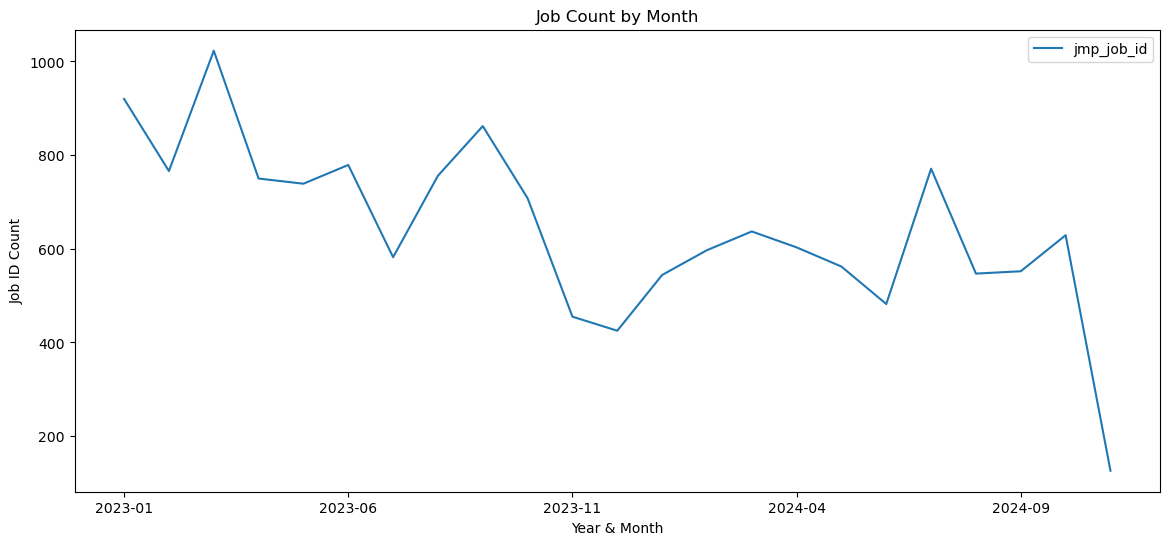

In [12]:
q4aym_grouped_df.plot(kind = 'line', figsize = (14,6))
plt.xlabel('Year & Month')
plt.ylabel('Job ID Count')
plt.title('Job Count by Month');

In [13]:
q4ayw_df = q4_df[['year_week', 'jmp_job_id']]

In [14]:
q4ayw_grouped_df = q4ayw_df.groupby('year_week').count()
q4aym_grouped_df

,jmp_job_id
year_month,
2023-01,920
2023-02,766
2023-03,1023
2023-04,750
2023-05,739
2023-06,779
2023-07,582
2023-08,756
2023-09,862


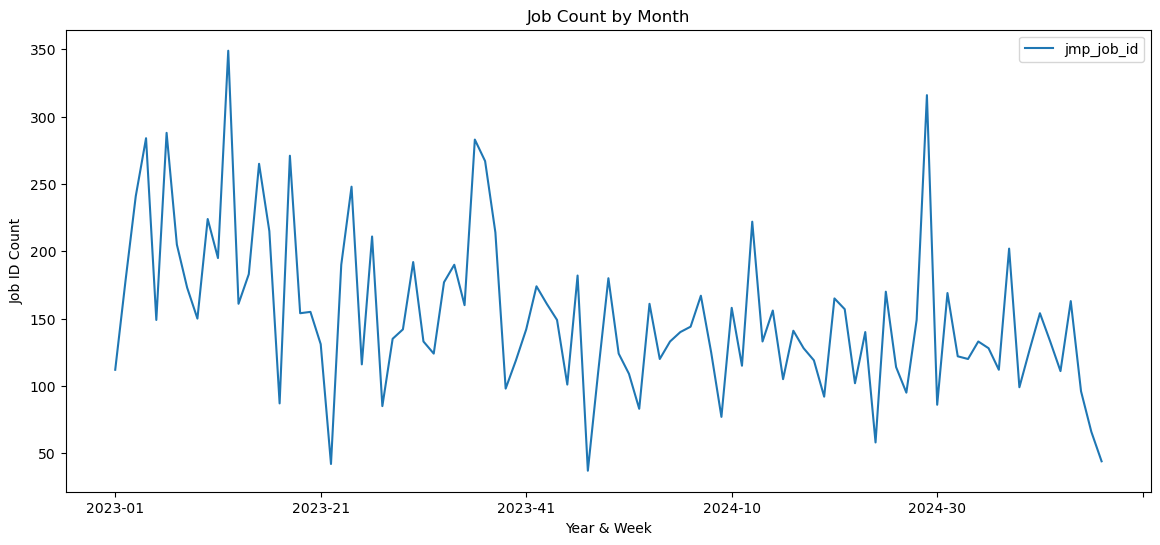

In [15]:
q4ayw_grouped_df.plot(kind = 'line', figsize = (14,6))
plt.xlabel('Year & Week')
plt.ylabel('Job ID Count')
plt.title('Job Count by Month');

How does on-time delivery vary by week, month, or over time? Does on-time delivery vary by part? To find on-time delivery, you can compare the jmp_completed_date to the jmp_production_due_date column from the jobs table.

In [17]:
q4_df.head()

,jmp_job_id,created_date,created_week_number,production_due_date,completed_date,date_diff,completion_status,jmp_part_id,jmp_order_quantity,jmp_production_quantity,year_month,year_week
0,31827-0002-001,2023-09-08,36,2023-10-05,2023-09-27,-8.0,On-time,K007-0220,50,50,2023-09,2023-36
1,31827-0003-001,2023-09-08,36,2023-10-05,2023-09-20,-15.0,On-time,K007-0820,20,20,2023-09,2023-36
2,31831-0001-001,2023-09-08,36,2023-10-31,2023-10-16,-15.0,On-time,M030-0472,160,160,2023-09,2023-36
3,31832-0001-001,2023-09-08,36,2023-09-16,2023-09-25,9.0,Late,M030-0008,300,300,2023-09,2023-36
4,31833-0001-001,2023-09-08,36,2023-09-20,2023-09-25,5.0,Late,M030-0008,300,300,2023-09,2023-36


In [18]:
q4bym_on_time_df = q4_df.loc[q4_df['completion_status'] == 'On-time']
q4byw_on_time_df = q4_df.loc[q4_df['completion_status'] == 'On-time']

In [19]:
q4bym_on_time_df = q4bym_on_time_df[['year_month', 'jmp_job_id']]
q4byw_on_time_df = q4byw_on_time_df[['year_week', 'jmp_job_id']]

In [20]:
q4bym_grouped_df = q4bym_on_time_df.groupby(q4bym_on_time_df.year_month).count()
q4bym_grouped_df

,jmp_job_id
year_month,
2023-01,623
2023-02,615
2023-03,785
2023-04,539
2023-05,476
2023-06,566
2023-07,408
2023-08,507
2023-09,592


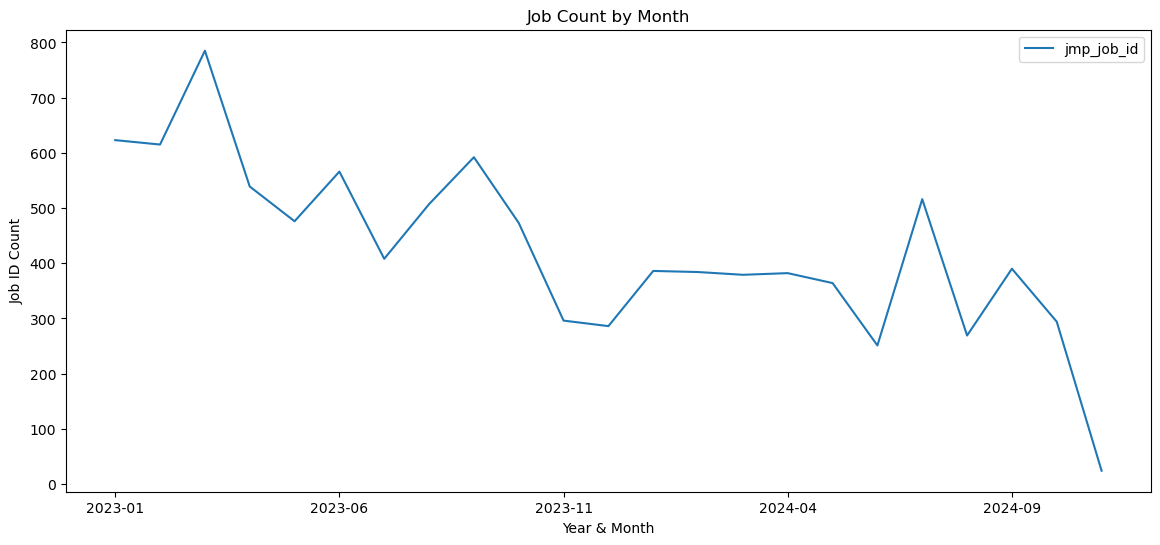

In [21]:
q4bym_grouped_df.plot(kind = 'line', figsize = (14,6))
plt.xlabel('Year & Month')
plt.ylabel('Job ID Count')
plt.title('Job Count by Month');

In [22]:
q4byw_grouped_df = q4byw_on_time_df.groupby(q4byw_on_time_df.year_week).count()
q4ayw_grouped_df

,jmp_job_id
year_week,
2023-01,112
2023-02,178
2023-03,241
2023-04,284
2023-05,149
...,...
2024-42,111
2024-43,163
2024-44,96


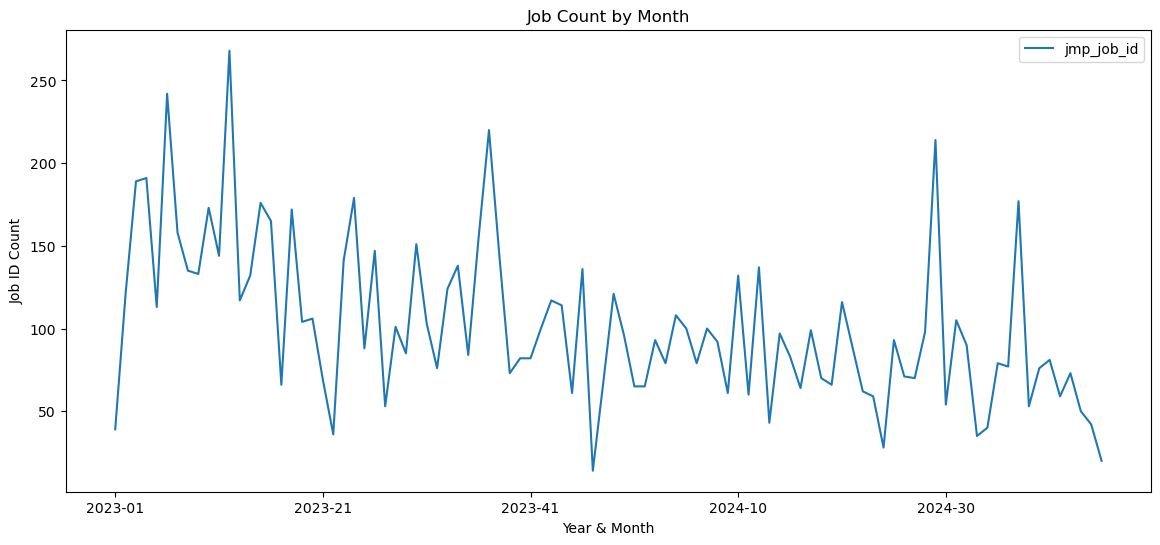

In [23]:
q4byw_grouped_df.plot(kind = 'line', figsize = (14,6))
plt.xlabel('Year & Month')
plt.ylabel('Job ID Count')
plt.title('Job Count by Month');